### Install Dependencies

In [1]:
!pip install -r requirements.txt

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Processing

In [3]:
df = pd.read_csv('data/processed/ChurnModelling_Missing_Values_Handled.csv')
df.head(5)

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f"No of rows: {len(df)}")

No of rows: 10000


### Outline Detection Techniques

#### Distribution Plot

In [5]:
categorical_columns = [
    'Geography',
    'Gender',
    'HasCrCard',
    'IsActiveMember',
    'Exited'
]

numerical_columns = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

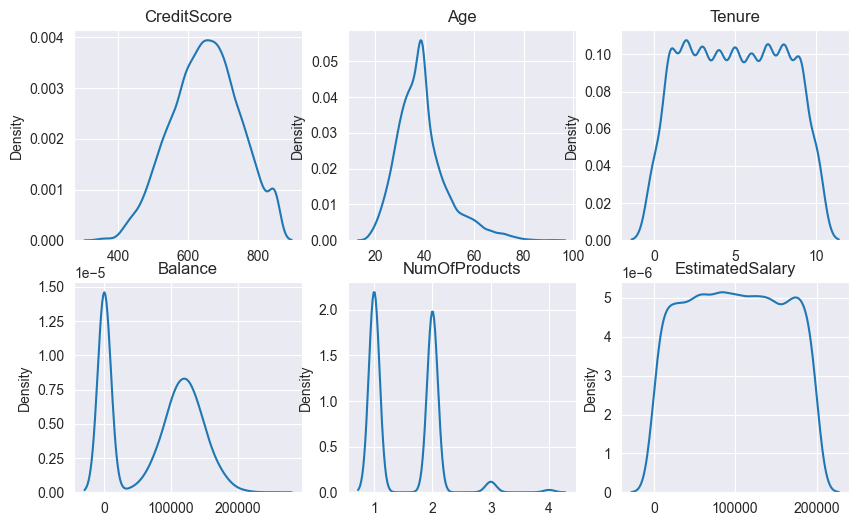

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
        data=df[col],
        ax=axes[idx],
    )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

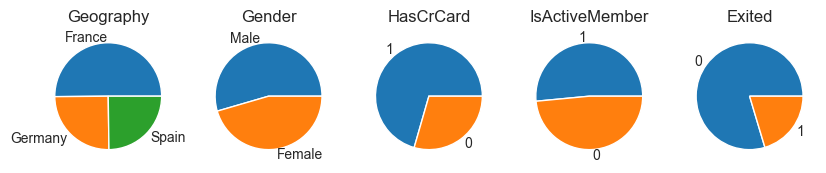

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(10, 6))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        ax=axes[idx],
    )

    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.show()

#### Box Plot

Useful for numerical variables to detect outliers.

<Axes: ylabel='EstimatedSalary'>

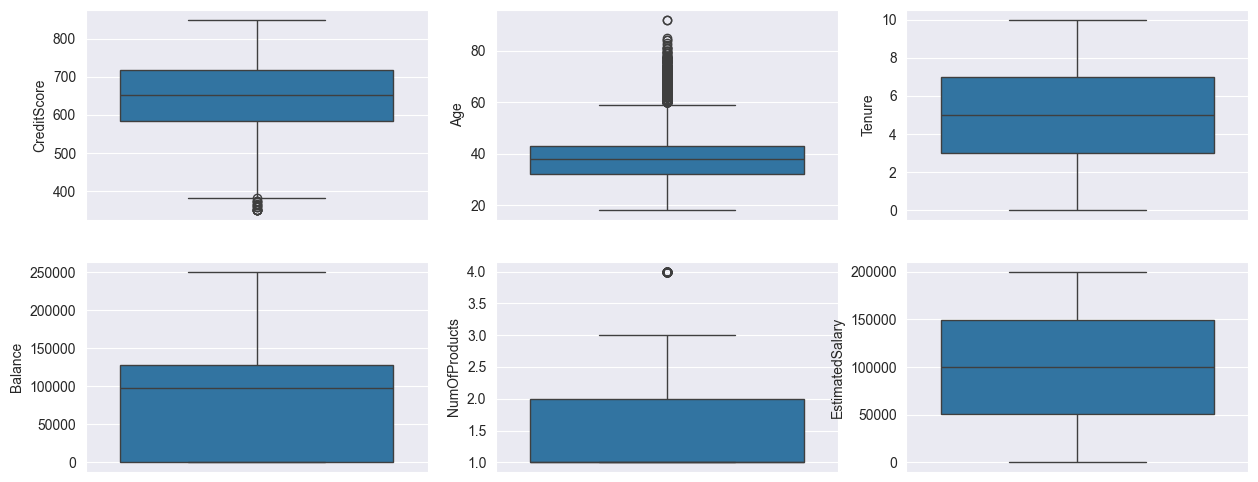

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

sns.boxplot(data=df['CreditScore'], ax=axes[0, 0])
sns.boxplot(data=df['Age'], ax=axes[0, 1])
sns.boxplot(data=df['Tenure'], ax=axes[0, 2])
sns.boxplot(data=df['Balance'], ax=axes[1, 0])
sns.boxplot(data=df['NumOfProducts'], ax=axes[1, 1])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1, 2])

#### Empirical Rule / 3 Sigma Rule

In [24]:
def find_anomaly(data):
    mean = np.mean(data)
    std = np.std(data)

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [25]:
numerical_columns = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary'
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col])
    print(f"{col} - No of outliers: {n_outliers.sum()} ({(n_outliers.sum() / len(df)) * 100:.2f}%)")

CreditScore - No of outliers: 8 (0.08%)
Age - No of outliers: 144 (1.44%)
Tenure - No of outliers: 0 (0.00%)
Balance - No of outliers: 0 (0.00%)
EstimatedSalary - No of outliers: 0 (0.00%)


#### IQR Method

In [26]:
def find_anomaly(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    return (data > upper_bound) | (data < lower_bound)

In [27]:
numerical_columns = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary'
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col])
    print(f"{col} - No of outliers: {n_outliers.sum()} ({(n_outliers.sum() / len(df)) * 100:.2f}%)")

CreditScore - No of outliers: 15 (0.15%)
Age - No of outliers: 501 (5.01%)
Tenure - No of outliers: 0 (0.00%)
Balance - No of outliers: 0 (0.00%)
EstimatedSalary - No of outliers: 0 (0.00%)


In [37]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['Outlier Count'] = outlier_count

outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] == 2]
outlier_mask_log

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Outlier Count
8762,True,True,False,False,False,2


In [29]:
df.to_csv('data/processed/ChurnModelling_Outliers_Handled.csv', index=False)